# Seattle Weather RandomForestClassifier

First, we need to load our dataset. I've got the Seattle weather dataset in a CSV file. Let's import it using pandas.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


Next, we'll prepare the data for training. We'll select relevant features and encode the labels.\
\
We NEED to encode the label because it is a categorical value and we want to transform it to a numerical value.

And why do we need a numerical value? well because Many machine learning algorithms, including Random Forests, require a numerical input.

In [5]:
# Prepare the data
features = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
labels = df['weather']

# Encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


In [7]:
labels_encoded

array([0, 2, 2, ..., 1, 4, 4])

We'll split the data into training and testing sets using `train_test_split`.

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

Now, let's train our Random Forest model.

In [9]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

After training, we'll make predictions and evaluate the model using a classification report.

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293



Finally, let's visualize one of the trees in our Random Forest.

## Usually the left branch is for when the condition is **False** and the right branch for when the condition is **True**

### The Gini impurity (or Gini index) is a measure of impurity used to evaluate the quality of a split in decision tree algorithms.\
\
### A Gini impurity of 0 indicates that all items in the node belong to a single class (pure node).\
\
### When constructing a decision tree, the algorithm tries to minimize the Gini impurity at each split.\
\
### TLDR: The Gini impurity value helps in understanding how well the node splits the data into different classes.

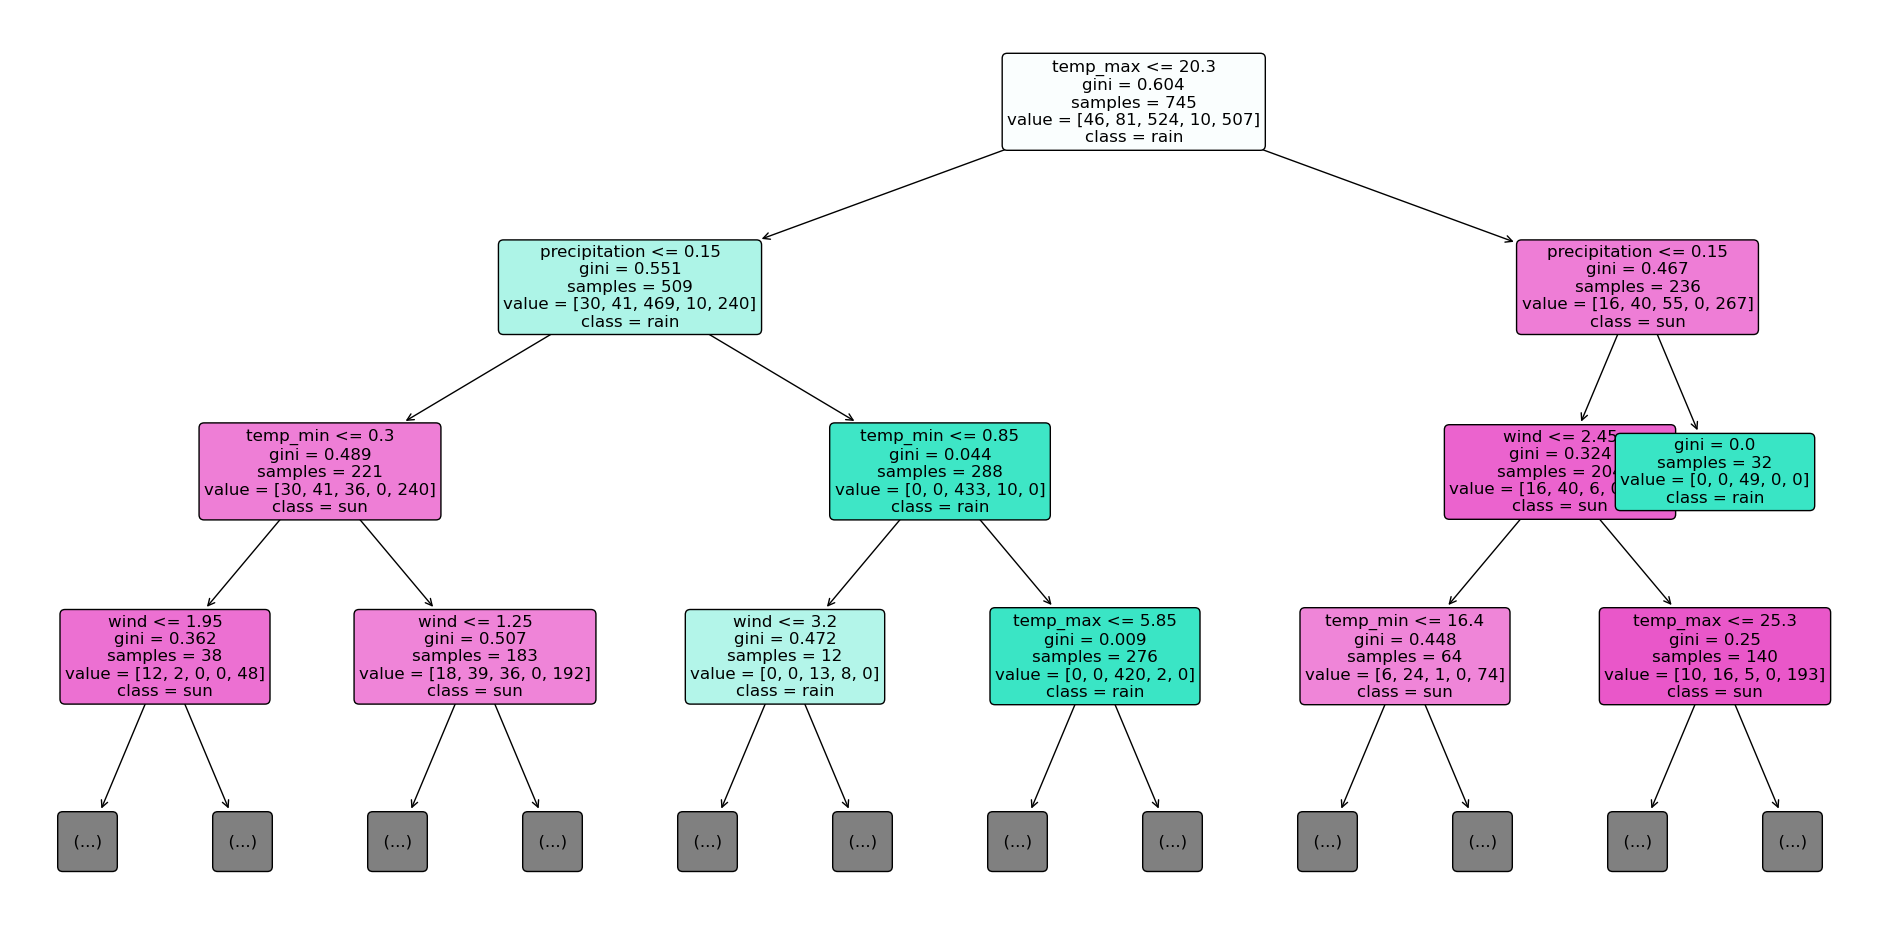

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualize one of the trees in the forest using matplotlib
plt.figure(figsize=(24, 12))
tree = model.estimators_[0]
plot_tree(tree, feature_names=features.columns.tolist(), class_names=label_encoder.classes_.tolist(), filled=True, rounded=True, fontsize=12, max_depth=3)
plt.show()

### A Random Forest is an ensemble learning method that consists of multiple decision trees.
\
### Each tree is trained on a random subset of the data (with replacement, known as bootstrapping) and a random subset of the features.
\
### The final prediction of the Random Forest is obtained by aggregating the predictions of all individual trees, typically through majority voting (for classification) or averaging (for regression).
\
\
### `model.estimators_` is a list of all the decision tree classifiers in the Random Forest.

In [19]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)